Nama : Citra Rahmawati <br>
NIM : 211351037 <br>
Kelas : IF Pagi B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"citrarahmawati","key":"4c009b61244b91a638cd19314287b4bd"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d jillanisofttech/brain-stroke-dataset

  0% 0.00/47.2k [00:00<?, ?B/s]
100% 47.2k/47.2k [00:00<00:00, 74.5MB/s]


In [4]:
!mkdir brain-stroke-dataset
!unzip brain-stroke-dataset.zip -d brain-stroke-dataset
!ls brain-stroke-dataset

Archive:  brain-stroke-dataset.zip
  inflating: brain-stroke-dataset/brain_stroke.csv  
brain_stroke.csv


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [7]:
import pickle

# Data Discovery

In [8]:
df = pd.read_csv('/content/brain-stroke-dataset/brain_stroke.csv')

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [12]:
df.shape

(4981, 11)

In [14]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [16]:
df[df['stroke']==1].groupby(df['gender']).count()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,140,140,140,140,140,140,140,140,140,140,140
Male,108,108,108,108,108,108,108,108,108,108,108


In [17]:
df[df['stroke']==0].groupby(df['gender']).count()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767
Male,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966


# EDA (minimal 5)

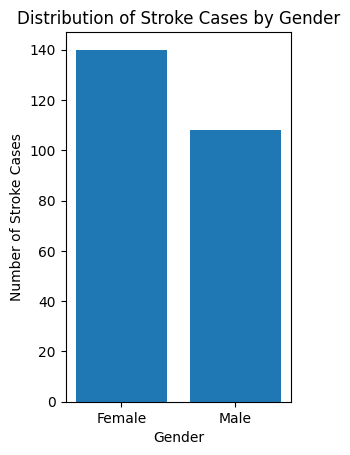

In [18]:
plt.subplot(1,2,1)

stroke_cases = df[df['stroke'] == 1]


stroke_counts_by_gender = stroke_cases.groupby('gender').size()


plt.bar(stroke_counts_by_gender.index, stroke_counts_by_gender.values)


plt.xlabel('Gender')
plt.ylabel('Number of Stroke Cases')
plt.title('Distribution of Stroke Cases by Gender')


plt.show()

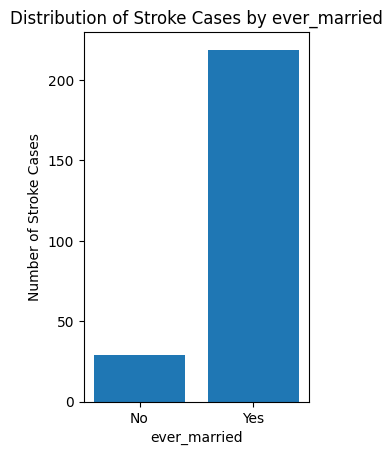

In [19]:
plt.subplot(1,2,1)

stroke_cases = df[df['stroke'] == 1]


stroke_counts_by_ever_married = stroke_cases.groupby('ever_married').size()


plt.bar(stroke_counts_by_ever_married.index, stroke_counts_by_ever_married.values)


plt.xlabel('ever_married')
plt.ylabel('Number of Stroke Cases')
plt.title('Distribution of Stroke Cases by ever_married')


plt.show()

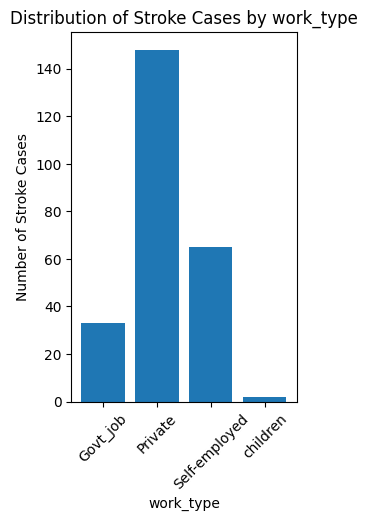

In [20]:
plt.subplot(1,2,1)

stroke_cases = df[df['stroke'] == 1]


stroke_counts_by_work_type = stroke_cases.groupby('work_type').size()


plt.bar(stroke_counts_by_work_type.index, stroke_counts_by_work_type.values)


plt.xlabel('work_type')
plt.ylabel('Number of Stroke Cases')
plt.title('Distribution of Stroke Cases by work_type')

plt.xticks(rotation=45)
plt.show()

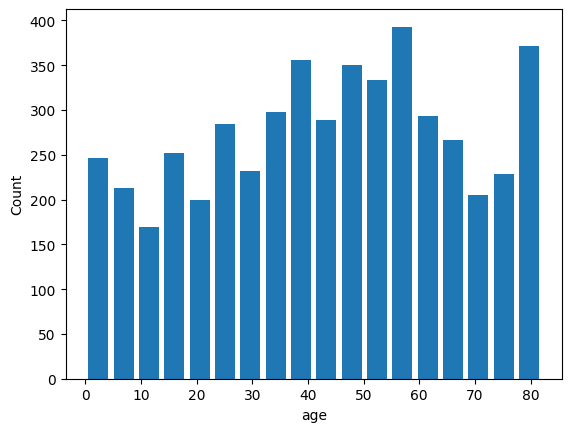

In [22]:
plt.hist(df["age"],bins=18, rwidth=0.8)
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

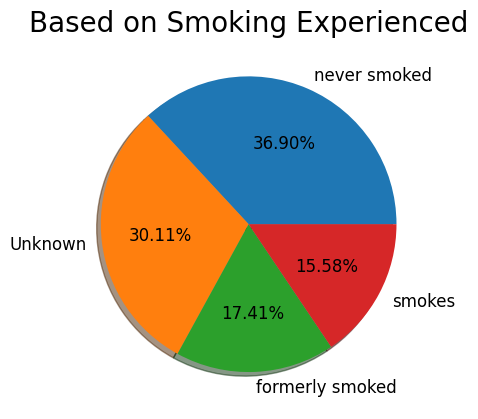

In [24]:
plt.rcParams.update({'font.size': 12})
ax=df['smoking_status'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)
ax.set_title(label = "Based on Smoking Experienced", fontsize = 20);
plt.axis('off')

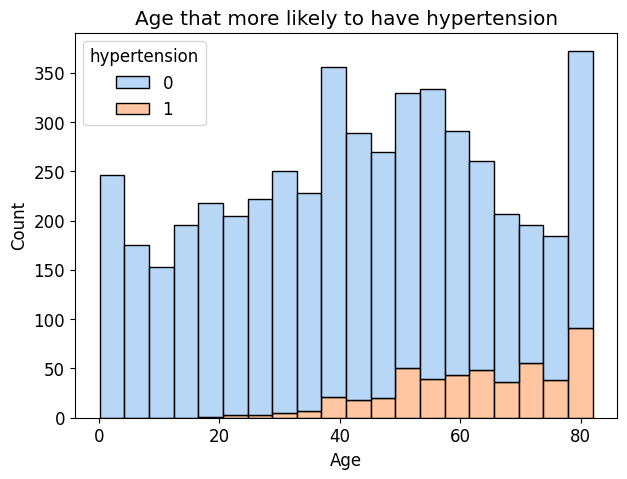

In [25]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='age', hue = 'hypertension',multiple = 'stack',palette = 'pastel')
plt.title("Age that more likely to have hypertension")
plt.xlabel("Age");

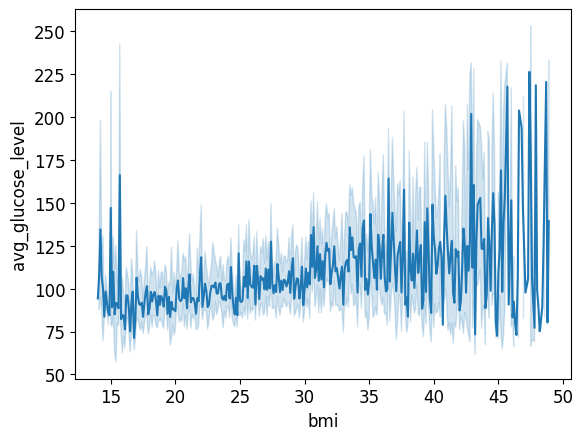

In [26]:
sns.lineplot(data = df, x = 'bmi',y = 'avg_glucose_level');

# Preprocessing

In [27]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [52]:
df['ever_married'] = [ 1 if i !='Yes' else 0 for i in df['ever_married'] ]
df['gender'] = [1 if i != 'Female' else 0 for i in df['gender']]

In [53]:
df=pd.get_dummies(df,columns=['work_type','Residence_type','smoking_status'])

KeyError: ignored

In [55]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0
2,1,49.0,0,0,1,171.23,34.4,1,0,1,0,0,0,1,0,0,0,1
3,1,79.0,1,0,1,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0


# modeling

In [31]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [40]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0,
    random_state=42, splitter='best'
)

model = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

In [41]:
print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

akurasi data training = 0.9480780263912794
akurasi data testing = 0.9565217391304348 



In [42]:
confusion_mat = confusion_matrix(y_test, y_pred)

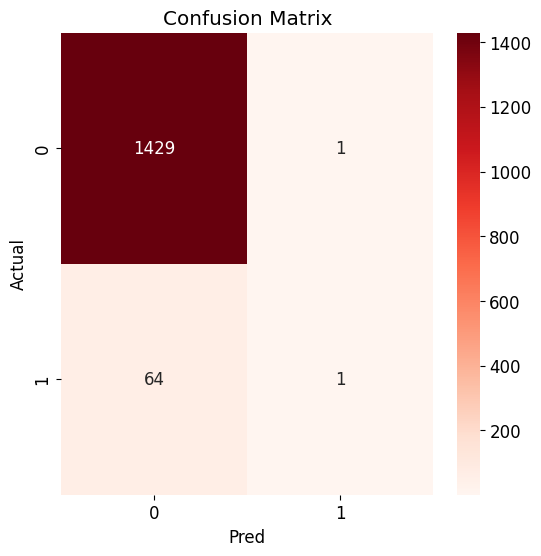

In [45]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Reds", xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Pred')
plt.ylabel('Actual')
plt.show()

In [56]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0
2,1,49.0,0,0,1,171.23,34.4,1,0,1,0,0,0,1,0,0,0,1
3,1,79.0,1,0,1,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0


In [57]:
input_data = (1,67.0,0,1,1,228.69,36.6,0,1,0,0,0,1,0,1,0,0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Tidak Berpotensi Stroke')
else:
  print('Berpotensi Stroke')

[0]
Tidak Berpotensi Stroke


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi hasil algoritma

In [59]:
ind_col = [col for col in df.columns if col!= 'stroke']
dep_col = 'stroke'

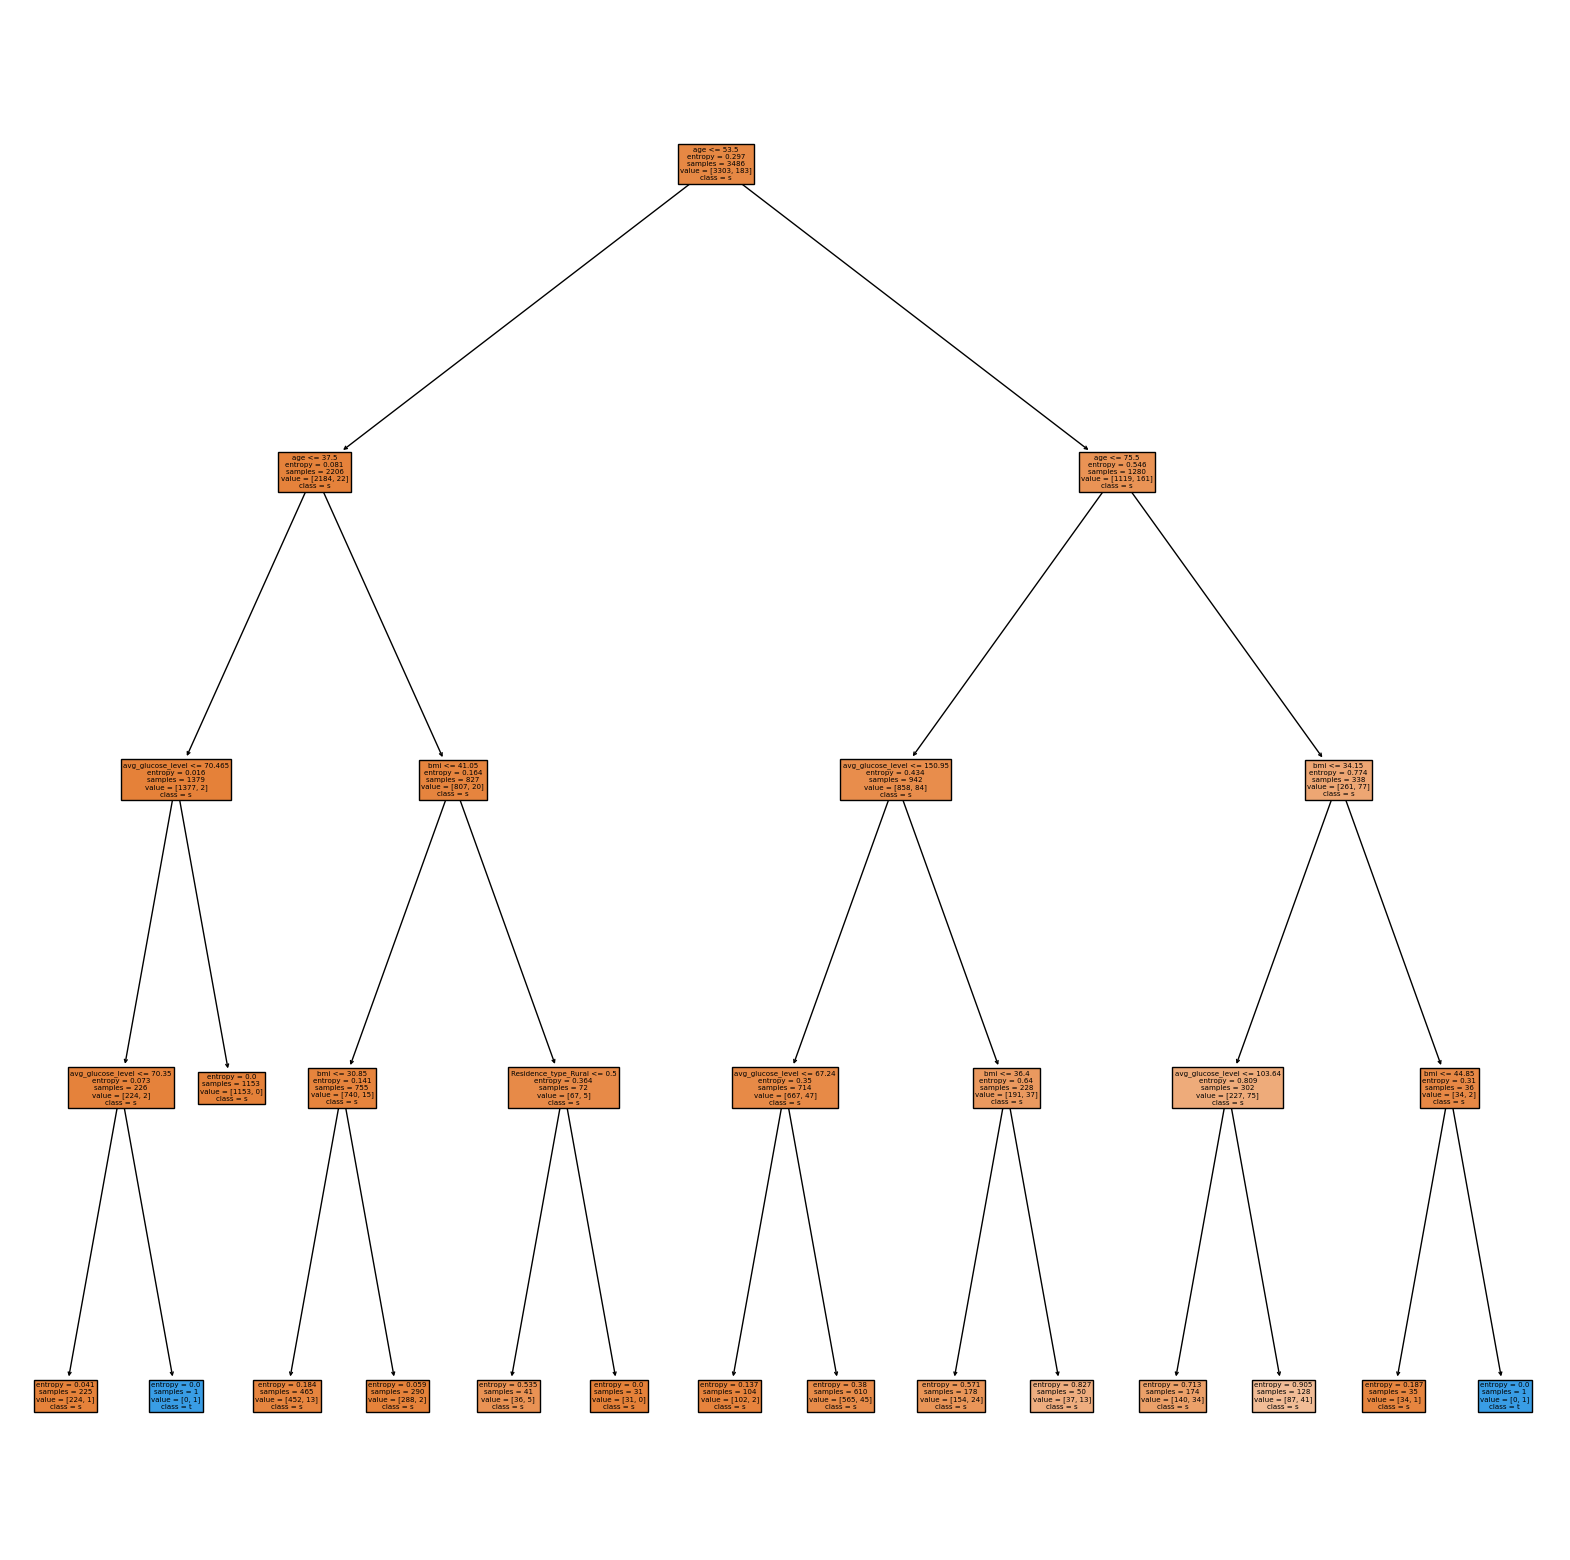

In [60]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=dep_col,
                   filled=True)

# save model (pickle)

In [61]:
filename = 'brain_stroke.sav'
pickle.dump(model, open(filename,'wb'))